## 基础知识

### mysql启动和登录

以管理员身份运行  
net start MySQL服务名  
net stop MySQL服务名  


mysql -h 主机名 -P 端口号 -u 用户名 -p密码  

例如：mysql -h localhost -P 3306 -u root -proot

（1）-p与密码之间不能有空格，其他参数名与参数值之间可以有空格也可以没有空格
		mysql -hlocalhost -P3306 -uroot -proot
        
（2）密码建议在一行输入
		mysql -h localhost -P 3306 -u root -p  
		Enter password:****
        
（3）如果是连本机：-hlocalhost就可以省略，如果端口号没有修改：-P3306也可以省略  
		简写成：mysql -u root -p  
			    Enter password:**  


### DQL(Data Query)

#### limit

limit x, y   
从第x个开始（不包括x），一共取y个

```mysql
select Salary 
from Employee
group by Salary
order by Salary
limit 1,1
```
取工资第二高， limit 1,1

#### 分组后聚合函数

COUNT()：统计指定列不为NULL的记录行数；  
MAX()：计算指定列的最大值，如果指定列是字符串类型，那么使用字符串排序运算；  
MIN()：计算指定列的最小值，如果指定列是字符串类型，那么使用字符串排序运算；  
SUM()：计算指定列的数值和，如果指定列类型不是数值类型，那么计算结果为0；  
AVG()：计算指定列的平均值，如果指定列类型不是数值类型，那么计算结果为0；  
分组本身也能代表group特征


#### case when

1、  
case XX  
when YY then WW  
when YY then WW  
when YY then WW  
else//其他情况  
MM  
end  
如果没有else和及其子句，则返回NULL  

CASE   
WHEN 条件1 THEN result1  
WHEN 条件2 THEN result2  
....  
[ELSE resultn]  
END  


### Date 操作

#### DATE_ADD()  和 DATE_SUB() 函数

DATE_ADD(date,INTERVAL expr type)  
DATE_SUB(date,INTERVAL expr type)  
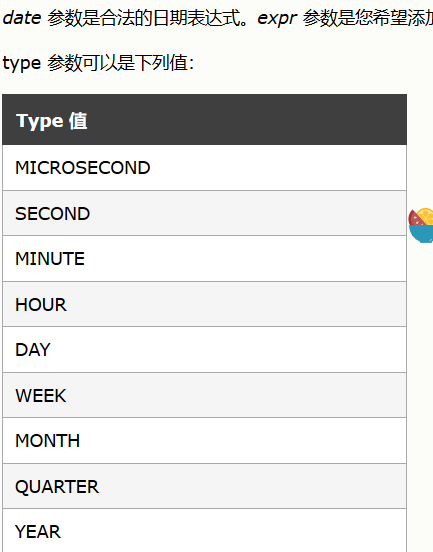

#### DATEDIFF() 函数

DATEDIFF(date1,date2)

date1 和 date2 参数是合法的日期或日期/时间表达式。

注释：只有值的日期部分参与计算。

#### DATE_FORMAT() 函数

语法

DATE_FORMAT(date,format)

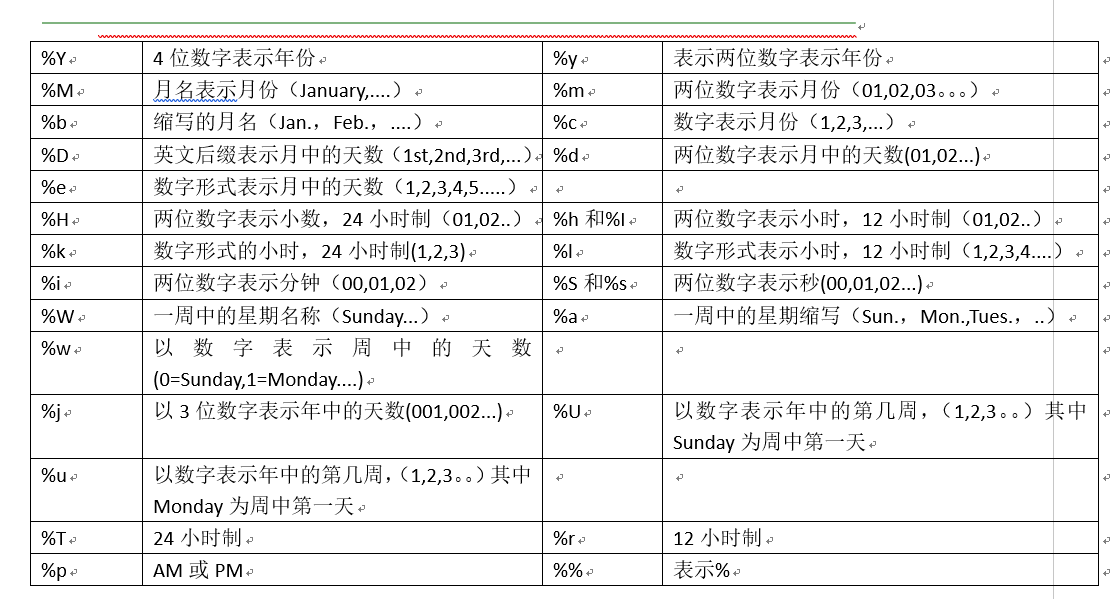

### sql 执行顺序

在上面的示例中 SQL 语句的执行顺序如下: 

　　 (1). 首先执行 FROM 子句, 从 tb_Grade 表组装数据源的数据 

　　 (2). 执行 WHERE 子句, 筛选 tb_Grade 表中所有数据不为 NULL 的数据 

　　 (3). 执行 GROUP BY 子句, 把 tb_Grade 表按 "学生姓名" 列进行分组(注：这一步开始才可以使用select中的别名，他返回的是一个游标，而不是一个表，所以在where中不可以使用select中的别名，而having却可以使用，感谢网友  zyt1369  提出这个问题)
   
　　 (4). 计算 max() 聚集函数, 按 "总成绩" 求出总成绩中最大的一些数值 

　　 (5). 执行 HAVING 子句, 筛选课程的总成绩大于 600 分的. 

　　 (7). 执行 ORDER BY 子句, 把最后的结果按 "Max 成绩" 进行排序. 

###  window function

In [ ]:
mysql> SELECT
         year, country, product, profit,
         SUM(profit) OVER() AS total_profit,
         SUM(profit) OVER(PARTITION BY country) AS country_profit
       FROM sales
       ORDER BY country, year, product, profit;
+------+---------+------------+--------+--------------+----------------+
| year | country | product    | profit | total_profit | country_profit |
+------+---------+------------+--------+--------------+----------------+
| 2000 | Finland | Computer   |   1500 |         7535 |           1610 |
| 2000 | Finland | Phone      |    100 |         7535 |           1610 |
| 2001 | Finland | Phone      |     10 |         7535 |           1610 |
| 2000 | India   | Calculator |     75 |         7535 |           1350 |
| 2000 | India   | Calculator |     75 |         7535 |           1350 |
| 2000 | India   | Computer   |   1200 |         7535 |           1350 |
| 2000 | USA     | Calculator |     75 |         7535 |           4575 |
| 2000 | USA     | Computer   |   1500 |         7535 |           4575 |
| 2001 | USA     | Calculator |     50 |         7535 |           4575 |
| 2001 | USA     | Computer   |   1200 |         7535 |           4575 |
| 2001 | USA     | Computer   |   1500 |         7535 |           4575 |
| 2001 | USA     | TV         |    100 |         7535 |           4575 |
| 2001 | USA     | TV         |    150 |         7535 |           4575 |
+------+---------+------------+--------+--------------+----------------+


+ 第一个over 参数为空， 即所有row都在一组
+ 第二over 以country分类

窗口函数只能出现在select 后或者 order by 后面  
窗口 执行在having 后， select 前  

#### 两种over的形式

1. 直接在over后写  
如OVER(PARTITION BY country)

2. over + 窗口名  
再定义 WINDOW w AS (ORDER BY val)

#### 非聚合函数

##### CUME_DIST() 和 PERCENT_RANK()

Returns the cumulative distribution of a value within a group of values;   
that is, the percentage of partition values less than or equal to the value in the current row  
求累计百分比，即<= 它的数据量的百分比  
 
 必须有order by

In [ ]:
mysql> SELECT
         val,
         ROW_NUMBER()   OVER w AS 'row_number',
         CUME_DIST()    OVER w AS 'cume_dist',
         PERCENT_RANK() OVER w AS 'percent_rank'
       FROM numbers
       WINDOW w AS (ORDER BY val);
+------+------------+--------------------+--------------+
| val  | row_number | cume_dist          | percent_rank |
+------+------------+--------------------+--------------+
|    1 |          1 | 0.2222222222222222 |            0 |
|    1 |          2 | 0.2222222222222222 |            0 |
|    2 |          3 | 0.3333333333333333 |         0.25 |
|    3 |          4 | 0.6666666666666666 |        0.375 |
|    3 |          5 | 0.6666666666666666 |        0.375 |
|    3 |          6 | 0.6666666666666666 |        0.375 |
|    4 |          7 | 0.8888888888888888 |         0.75 |
|    4 |          8 | 0.8888888888888888 |         0.75 |
|    5 |          9 |                  1 |            1 |
+------+------------+--------------------+--------------+

##### DENSE_RANK() 和 RANK() 和 ROW_NUMBER()

DENSE_RANK()  
返回组内的排序， without gaps， 即相同的值有相同的排名，排名连续不断  
必须有order by 

RANK()  
排名并不连续

ROW_NUMBER()  
返回行号

In [ ]:
mysql> SELECT
         val,
         ROW_NUMBER() OVER w AS 'row_number',
         RANK()       OVER w AS 'rank',
         DENSE_RANK() OVER w AS 'dense_rank'
       FROM numbers
       WINDOW w AS (ORDER BY val);
+------+------------+------+------------+
| val  | row_number | rank | dense_rank |
+------+------------+------+------------+
|    1 |          1 |    1 |          1 |
|    1 |          2 |    1 |          1 |
|    2 |          3 |    3 |          2 |
|    3 |          4 |    4 |          3 |
|    3 |          5 |    4 |          3 |
|    3 |          6 |    4 |          3 |
|    4 |          7 |    7 |          4 |
|    4 |          8 |    7 |          4 |
|    5 |          9 |    9 |          5 |
+------+------------+------+------------+

##### LAG() 和 LEAD()

LAG(expr [, N[, default]]) [null_treatment]     
返回排序后当前行的 前N行的数据  
如果不存在， 返回defaul  
N 默认为1， defaul 默认为 null  

LEAD()  
后面的数据

常用来比较前后差异

In [ ]:
mysql> SELECT
         t, val,
         LAG(val)        OVER w AS 'lag',
         LEAD(val)       OVER w AS 'lead',
         val - LAG(val)  OVER w AS 'lag diff',
         val - LEAD(val) OVER w AS 'lead diff'
       FROM series
       WINDOW w AS (ORDER BY t);
+----------+------+------+------+----------+-----------+
| t        | val  | lag  | lead | lag diff | lead diff |
+----------+------+------+------+----------+-----------+
| 12:00:00 |  100 | NULL |  125 |     NULL |       -25 |
| 13:00:00 |  125 |  100 |  132 |       25 |        -7 |
| 14:00:00 |  132 |  125 |  145 |        7 |       -13 |
| 15:00:00 |  145 |  132 |  140 |       13 |         5 |
| 16:00:00 |  140 |  145 |  150 |       -5 |       -10 |
| 17:00:00 |  150 |  140 |  200 |       10 |       -50 |
| 18:00:00 |  200 |  150 | NULL |       50 |      NULL |
+----------+------+------+------+----------+-----------+

#### 聚合函数累计 sum、avg、min、max等

没有 order by 就是一般的聚合函数，所有组内都一样

有order by 就是累计计算

partition by：执行分组功能  
order by：表面是排序功能，实际是累计功能！！！  
再强调一遍：order by 表面是排序功能，实际是累计功能！  

order by经常被用来和partition by连用，计算名次，可实际是累计作用的，仔细想想可以发现，计算组内名次不就是在累计吗，每个人的名次都是综合他之前所有人的名次基础上得来的。

### DML

#### 插入 insert

insert into [表名] values()

可以插入子查询

#列顺序可以任意，可以为null的可以省略 select返回的结果和插入数据的字段数量、顺序、类型需要一致。  
```sql
INSERT INTO beauty(id, `name`, sex, borndate, phone, photo, boyfriend_id)
VALUES (13, 'aaa', '女', '1990-4-23', '12345', NULL, 22);
```

说明：  
值和字段需要一一对应  
如果是字符型或日期类型，值需要用单引号引起来；如果是数值类型，不需要用单引号  
字段和值的个数必须一致，位置对应  
字段如果不能为空，则必须插入值  
可以为空的字段可以不用插入值，但需要注意：字段和值都不写；或字段写上，值用null代替  
表名后面的字段可以省略不写，此时表示所有字段，顺序和表中字段顺序一致。  


#set

```sql
INSERT INTO beauty
SET id = 17, `name` = '刘', phone='110';
```

#一次插入多行， 省略列名默认按照表的顺序
```sql
INSERT INTO beauty
VALUES (23, 'aaa', '女', '1990-4-23', '12345', NULL, 22),
(24, 'aaa', '女', '1990-4-23', '12345', NULL, 22),
(25, 'aaa', '女', '1990-4-23', '12345', NULL, 22);
```

#### on duplicated key update

```sql
INSERT INTO pms_statistic (
	id,
	tenantId,
	tenantName,
	isDeleted,
	createTime
)
VALUES
	(
		6257,50,'保存或修改0',1,'2020-01-00'
	) ,(
		6258,51,'保存或修改1',1,'2020-01-01'
	) ,(
		6259,52,'保存或修改2',1,'2020-01-02'
	) ,(
		62510,53,'保存或修改3',1,'2020-01-03'
	) 
ON DUPLICATE KEY UPDATE tenantId = VALUES(tenantId),tenantName = VALUES(tenantName)
		,isDeleted = VALUES(isDeleted),createTime = VALUES(createTime);
```

#### 修改 update

**修改单表记录**
```sql
update 表名
set 列=value, ... ,列=value
where 筛选
```
eg.  
#大于10的电话改成110  

```sql
UPDATE beauty
SET phone = 110
WHERE id > 10;
```
---

**修改多表记录**
```sql
update
两表连接
set
where
```

eg.  
#修改没有男朋友的人的boyfriend id 为404  
```sql
UPDATE beauty AS be 
LEFT JOIN boys AS bo
ON be.boyfriend_id = bo.id
SET be.boyfriend_id = 404
WHERE bo.id IS NULL; 
```

#### 删除 delete truncate

```sql
delete from 表
where 筛选条件
```

**已删除就是整行删除**

eg.  
#删除手机号9结尾
```sql
DELETE FROM beauty
WHERE phone LIKE '%9';
```
---

**多表语法**
```sql
delete 表1别名（如果两个表一起删就一起加上）
from 两表连接
where
```
#多表，删除张无忌的女朋友
```sql
DELETE be
FROM beauty AS be
JOIN boys AS bo ON be.boyfriend_id = bo.id
WHERE bo.boyName = '张无忌';
```


---

**truncate**  
truncate table 直接删除表

**drop，truncate，delete区别**
+ drop (删除表)：删除内容和定义，释放空间，简单来说就是把整个表去掉，以后要新增数据是不可能的，除非新增一个表。
+ truncate (清空表中的数据)：删除内容、释放空间但不删除定义(保留表的数据结构)，与drop不同的是，只是清空表数据而已  
自增长列会从1开始
+ 如果有自增列，truncate方式删除之后，自增列的值会被初始化，delete方式要分情况（如果数  
据库被重启了，自增列值也会被初始化，数据库未被重启，则不变）
+ 如果要删除表定义及其数据，请使用 drop table 语句
+ 安全性：小心使用 drop 和 truncate，尤其没有备份的时候，否则哭都来不及
+ 删除速度，一般来说: drop> truncate > delete

+ delete语句是数据库操作语言(dml)，这个操作会放到 rollback segement 中，事务提交之后才生  
效；如果有相应的 trigger，执行的时候将被触发。  
truncate、drop 是数据库定义语言(ddl)，操作立即生效，原数据不放到 rollback segment 中，  
不能回滚，操作不触发 trigger。

### DDL

#### 库管理  创建、删除

```sql
#创建
CREATE DATABASE IF NOT EXISTS books;
# 删除
DROP DATABASE IF EXISTS books;
```

#### 表的创建 create table

```sql
create table 表名(
    列名    类型[长度， 约束]
)
```

eg.
```sql
CREATE TABLE book(
				id INT NOT NULL, 
				bname VARCHAR(20),
				price DOUBLE,
				author_id INT,
				pub_date DATETIME			
);
DESC book;
```

#### 表的修改 alter table

1. 修改列名  
```sql
ALTER TABLE ... CHANGE COLUMN 1  2 类型
ALTER TABLE book CHANGE COLUMN pub_date  pb_date DATETIME;
```

2. 修改类型，约束
```sql
ALTER TABLE ... MODIFY COLUMN 列 类型 ;
ALTER TABLE book MODIFY COLUMN pb_date TIMESTAMP;
```

3. 添加列
```sql
ALTER TABLE author ADD COLUMN annual DOUBLE;
```

4. 删除列
```sql
ALTER TABLE author DROP COLUMN annual;
```

5. 修改表名
```sql
ALTER TABLE author RENAME TO author_info;
```

#### 表的删除

DROP TABLE IF EXISTS 表名;

#### 表的复制

In [ ]:
#仅仅复制表的结构
CREATE TABLE au_copy LIKE author_info;

#复制表
CREATE TABLE au_copy2 
SELECT * FROM author_info
WHERE id = 2;

#### 数据约束

1. NOT NULL 非空
2. DEFAULT  默认值
3. PRIMARY KEY 主键, 有唯一性并且非空
4. UNIQUE 有唯一性, 但可以为空
5. FOREIGN KEY 外键, 保证该列的值必须来另一个表的某列
			
列级约束： 不支持外键  
表级约束： 不支持非空，默认

例子：

```sql
CREATE TABLE book(
				id INT PRIMARY KEY,  #主键
				bname VARCHAR(20) UNIQUE,#可以为空,但不重复
				price DOUBLE,
				author_id INT DEFAULT 0,
				pub_date DATETIME			
);
```

##### 外键 表级约束

```sql
CREATE TABLE IF NOT EXISTS  book(
				id INT,  #主键
				bname VARCHAR(20),#非空,唯一不重复
				price DOUBLE,
				author_id INT,
				pub_date DATETIME,		
				
				CONSTRAINT pk PRIMARY KEY(id),#主键
			
				FOREIGN KEY(author_id) REFERENCES author_info(id)
				#CONSTRAINT+名 可以省略
    
                PRIMARY KEY(可以有组合)
);
```
外键要求:  
+ 外键必须是另一个表的键,或unique
+ 类型要求一致，兼容
+ 插入时先插入主表，再从表
+ 删除先删从表

修改时增加外键  
```sql
ALTER TABLE book ADD FOREIGN KEY(author_id) REFERENCES author_info(id);
```

##### 修改约束

show index from 查看键

删除主键:
```sql
ALTER TABLE 表名 DROP PRIMARY KEY;
```

删除外键：
```sql
ALTER TABLE 表名 DROP FOREIGN KEY +外键名;
```

#### 自增长列

自增长会自动，可以不用插入  
至多一个自增长列  
类型只能是数值型

```sql
CREATE TABLE IF NOT EXISTS  book(
				id INT PRIMARY KEY auto_increment,  #主键
				bname VARCHAR(20),#非空,唯一不重复
				price DOUBLE,
				author_id INT,
				pub_date DATETIME
);
```

### 变量

#### 用户变量

1. **声明并初始化(要求声明时必须初始化)**

方式1  
SET @变量名=值; 

方式2  
SET @变量名:=值;  

方式3  
select @变量名:=值;  

2. **赋值**

方式1： 
和变量的声明一样  
set @变量名=值;  
set @变量名:=值;  
select @变量名:=值;  

方式2

select 字段 into @变量名 from 表;

例子：  

```
SET @count = 1;
select count(*) 
INTO @count
from employees
```

#### 局部变量

**局部变量声明**  
declare 变量名 变量类型;  
declare 变量名 变量类型 [default 默认值];  

**赋值**  
方式1  
set 局部变量名=值;  
set 局部变量名:=值;  
select 局部变量名:=值;  
方式2  
select 字段 into 局部变量名 from 表;  

### 存储过程

```
create procedure 存储过程名([参数模式] 参数名 参数类型)    IN stuname VARCHAR(20)
begin
存储过程体
end

```

参数模式有3种：  
in：该参数可以作为输入，也就是该参数需要调用方传入值。  
out：该参数可以作为输出，也就是说该参数可以作为返回值。  
inout：该参数既可以作为输入也可以作为输出，也就是说该参数需要在调用的时候传入值，又可  
以作为返回值。  
参数模式默认为IN。  
一个存储过程可以有多个输入、多个输出、多个输入输出参数。  

存储过程中的sql 语句要加:  
DELIMITER 结束符号  
重新设置

调用   
call 存储过程名()

eg. 

```
DELIMITER $

CREATE PROCEDURE myp1()
BEGIN
SELECT * FROM admin;
END$
```

#### 带in参数的存储过程

```sql
#插入例子  
设置结束符为$
DELIMITER $

DROP PROCEDURE IF EXISTS proc2;

CREATE PROCEDURE proc2(id int,age int,in name varchar(16))
BEGIN
INSERT INTO t_user VALUES (id,age,name);
END $
将结束符置为;
DELIMITER ;
```

```sql
#登录例子  

CREATE PROCEDURE login(IN username VARCHAR(20), IN pass VARCHAR(20))
BEGIN
DECLARE result INT DEFAULT 0;				
SELECT COUNT(*)  INTO result
FROM admin
WHERE admin.`password` = pass
and admin.username = username;

SELECT IF(result>0,'登录成功','用户名或密码错误');
END;
```

#### 带out参数的存储过程

#根据女生，返回男生
```sql
CREATE PROCEDURE p2(IN girlname VARCHAR(20), OUT boyname VARCHAR(20))  会自动返回
BEGIN
    select into boyname
    from b
    join g
    on b.id = g.id
    where b.name = girlname
END $

```

#调用  
```sql
SET @Bname = '';
CALL p2('小昭', @Bname);

select @Bname;
```

#多个out
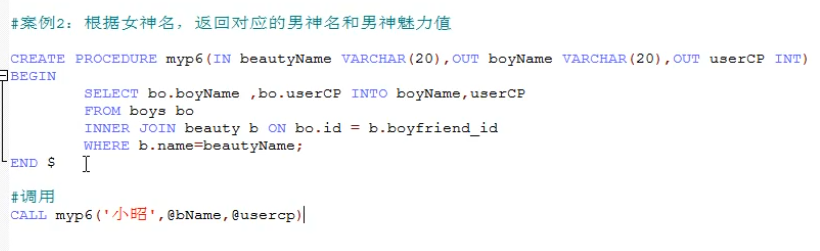

#### 带inout参数的存储过程

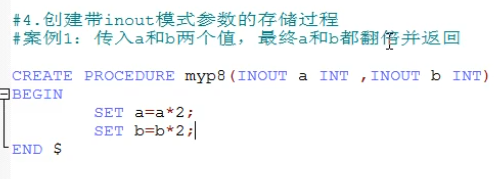

#### 与函数的区别

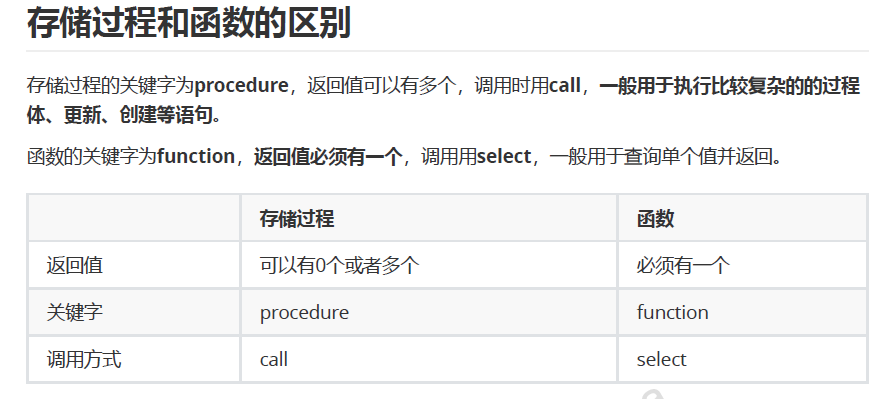

### 函数

创建函数  
```sql
create function 函数名(参数名称 参数类型)
returns 返回值类型
begin
函数体
end
```

调用函数  
```sql
select 函数名(实参列表);
```

eg.


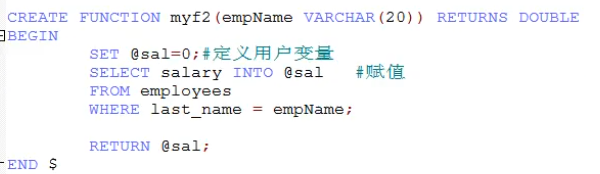

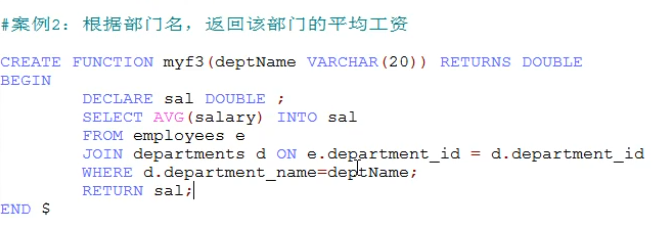

### 流程控制结构

#### if 结构

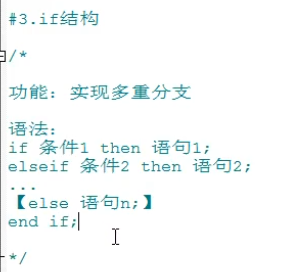

例子
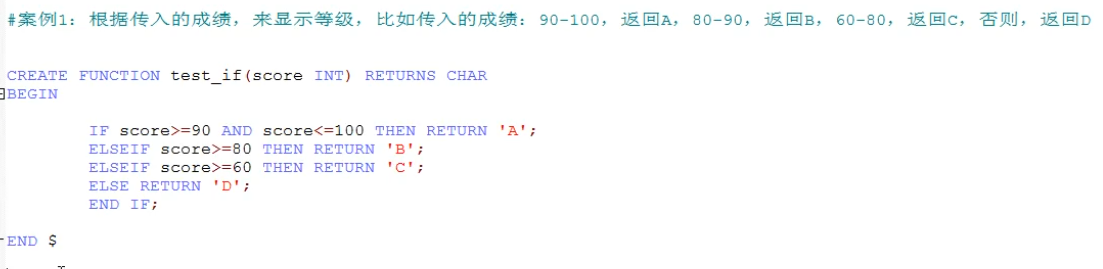

#### case

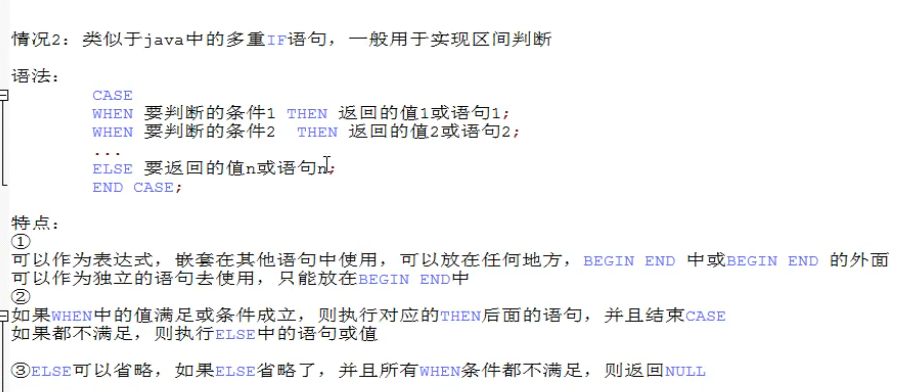

例子  
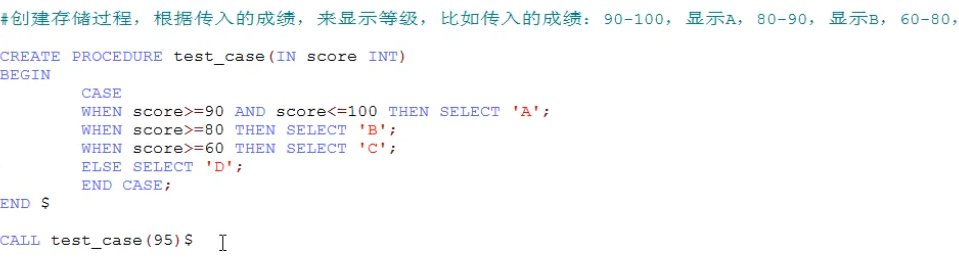

#### 循环

mysql中循环有3种写法  
1. while：类似于java中的while循环
2. repeat：类似于java中的do while循环
3. loop：类似于java中的while(true)死循环，需要在内部进行控制。
4. iterate 类似 continue
5. leave 类似break



##### while

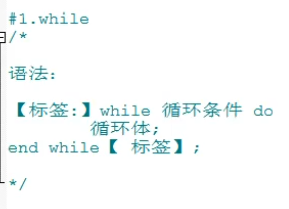

### 事务

#### 定义 

Transaction  
事务：一个最小的不可再分的工作单元；通常一个事务对应一个完整的业务(例如银行账户转账业务，该业务就是一个最小的工作单元)  
一个完整的业务需要批量的DML(insert、update、delete)语句共同联合完成  
事务只和DML语句有关，或者说DML语句才有事务。这个和业务逻辑有关，业务逻辑不同，DML语句的个数不同  


#### 事务的特性

+ 原子性(A)：事务是最小单位，不可再分


+ 一致性(C)：事务要求所有的DML语句操作的时候，必须保证同时成功或者同时失败


+ 隔离性(I)：事务A和事务B之间具有隔离性  
一个事务的执行不能被其他事务干扰。即一个事务内部的操作及使用的数据对并发的其他事务是隔离
的，并发执行的各个事务之间不能互相干扰。


+ 持久性(D)：是事务的保证，事务终结的标志(内存的数据持久到硬盘文件中)  
一个事务一旦提交，他对数据库中数据的改变就应该是永久性的。当事务提交之后，数据会持久化到硬
盘，修改是永久性的。

#### 隐式事务

事务自动开启、提交或回滚，比如insert、update、delete语句，事务的开启、提交或回滚由  
mysql内部自动控制的。

#### 显式事务

设置不自动提交事务  

set autocommit=0;

开启事务  

start transaction

DML语句  

结束事务

commit提交事务

rollback

savepoint

#### 隔离级别

##### 脏读(dirty read)

指一个线程中的事务读取到了另外一个线程中未提交的数据。

 e.g.  
1. Mary的原工资为1000, 财务人员将Mary的工资改为了8000(但未提交事务)
2. Mary读取自己的工资 ,发现自己的工资变为了8000，欢天喜地！
3. 而财务发现操作有误，回滚了事务,Mary的工资又变为了1000  
像这样,Mary记取的工资数8000是一个脏数据。

##### 不可重复读（NonRepeatable Read）

指一个线程中的事务读取到了另外一个线程中提交的update的数据

不可重复读 ：是指在一个事务内，多次读同一数据。在这个事务还没有结束时，另外一个事务也访问该同一数据。那么，在第一个事务中的两次读数据之间，由于第二个事务的修改，那么第一个事务两次读到的的数据可能是不一样的。这样在一个事务内两次读到的数据是不一样的，因此称为是不可重复读。
e.g.
1. 在事务1中，Mary 读取了自己的工资为1000,操作并没有完成
2. 在事务2中，这时财务人员修改了Mary的工资为2000,并提交了事务.
3. 在事务1中，Mary 再次读取自己的工资时，工资变为了2000

 解决办法：如果只有在修改事务完全提交之后才可以读取数据，则可以避免该问题。

##### 幻读（Phantom Read）

幻读：指一个线程中的事务读取到了另外一个线程中提交的insert的数据。  

幻读 : 是指当事务不是独立执行时发生的一种现象，例如第一个事务对一个表中的数据进行了修改，这种修改涉及到表中的全部数据行。同时，第二个事务也修改这个表中的数据，这种修改是向表中插入一行新数据。那么，以后就会发生操作第一个事务的用户发现表中还有没有修改的数据行，就好象发生了幻觉一样。

e.g.
目前工资为1000的员工有10人。
1. 事务1,读取所有工资为1000的员工。
2. 这时事务2向employee表插入了一条员工记录，工资也为1000
3. 事务1再次读取所有工资为1000的员工 共读取到了11条记录，
 
解决办法：如果在操作事务完成数据处理之前，任何其他事务都不可以添加新数据，则可避免该问题

不可重复读的重点是修改 :  
 同样的条件, 你读取过的数据,再次读取出来发现值不一样了  
幻读的重点在于新增或者删除  
 同样的条件, 第 1 次和第 2 次读出来的记录数不一样 

##### mysql四种隔离级别

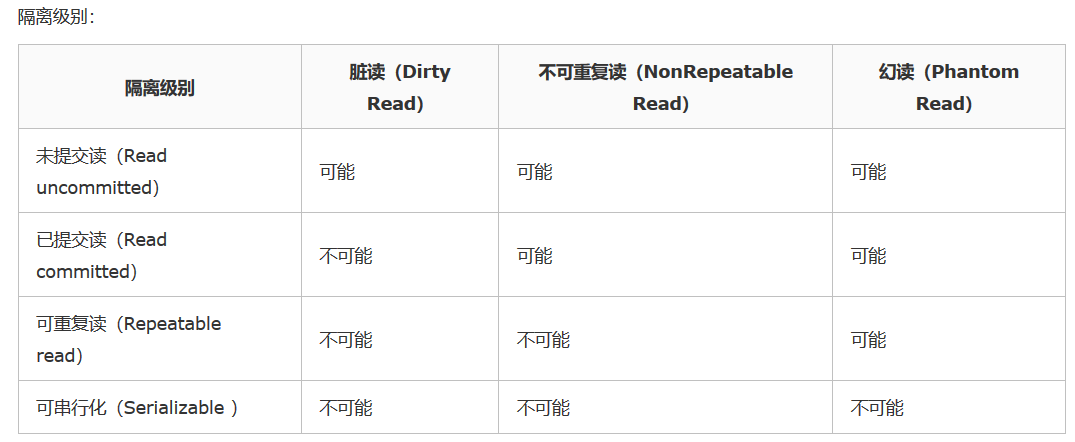

##### 未提交读（Read uncommitted）

- 事物A和事物B，事物A未提交的数据，事物B可以读取到
- 这里读取到的数据叫做“脏数据”
- 这种隔离级别最低，这种级别一般是在理论上存在，数据库隔离级别一般都高于该级别

##### 已提交读（Read committed）

- 事物A和事物B，事物A提交的数据，事物B才能读取到
- 这种隔离级别高于读未提交
- 换句话说，对方事物提交之后的数据，我当前事物才能读取到
- 这种级别可以避免“脏数据”
- 这种隔离级别会导致“不可重复读取”
- Oracle默认隔离级别

##### 可重复读（Repeatable read）

- 事务A和事务B，事务A提交之后的数据，事务B读取不到
- 事务B是可重复读取数据
- 这种隔离级别高于读已提交
- 换句话说，对方提交之后的数据，我还是读取不到
- 这种隔离级别可以避免“不可重复读取”，达到可重复读取
- 比如1点和2点读到数据是同一个
- MySQL默认级别
- 虽然可以达到可重复读取，但是会导致“幻像读”

##### 可串行化（Serializable ）

- 事务A和事务B，事务A在操作数据库时，事务B只能排队等待
- 这种隔离级别很少使用，吞吐量太低，用户体验差
- 这种级别可以避免“幻像读”，每一次读取的都是数据库中真实存在数据，事务A与事务B串行，而不并发

## 索引

### 基本语法

查看索引  
SHOW INDEX FROM table;  

创建  
CREATE [UNIQUE] INDEX [indexName] on table(字段);  

删除  
DROP INDEX [INDEXNAME] ON table(字段); 

### 是否应该创建索引

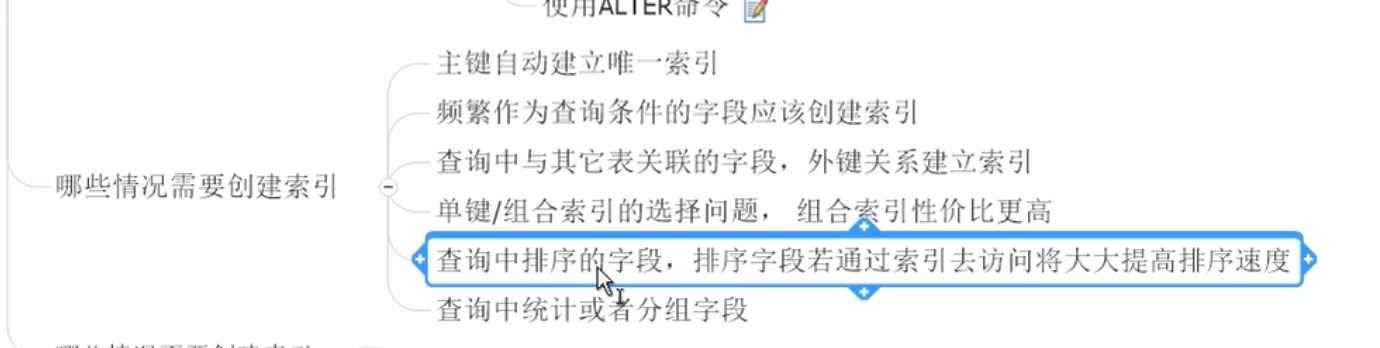

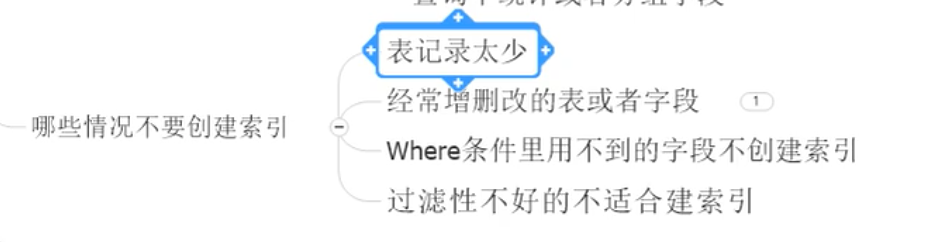

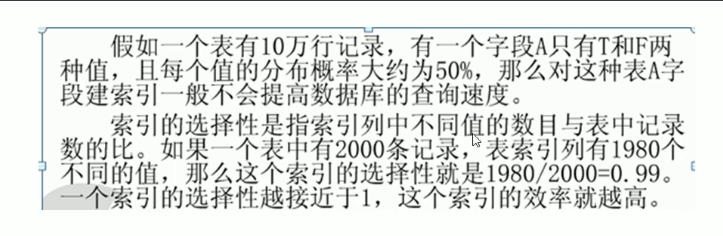

### 单值索引

只包含单列

### 唯一索引

必须唯一，但允许有null


### 主键索引

创建表时自动创建

### 复合索引

多个字段建立索引  

### Explain

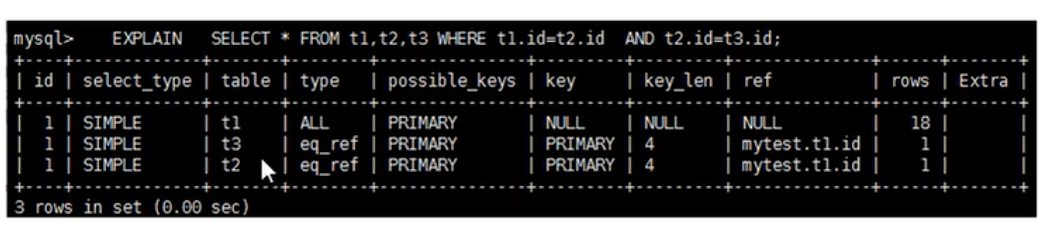

#### id 表示 表的读取顺序

id 相同 ， 顺序从上到下

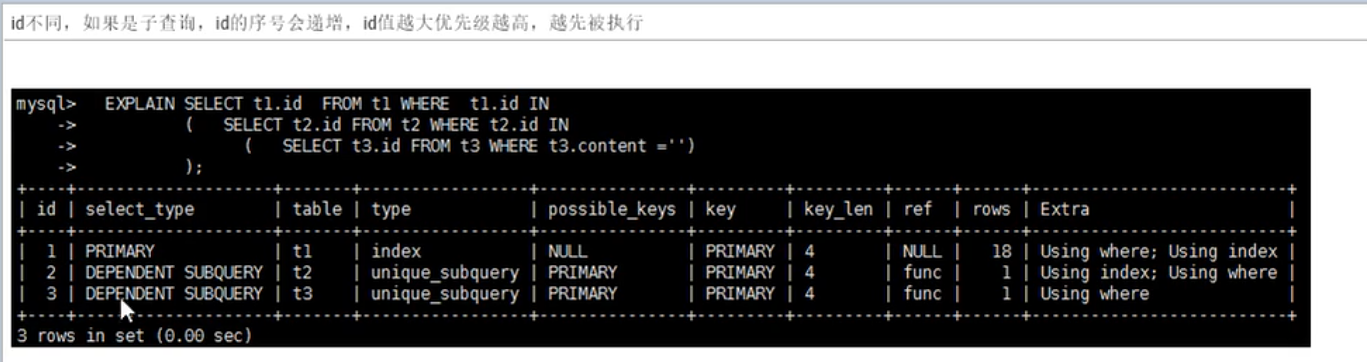

#### select_type

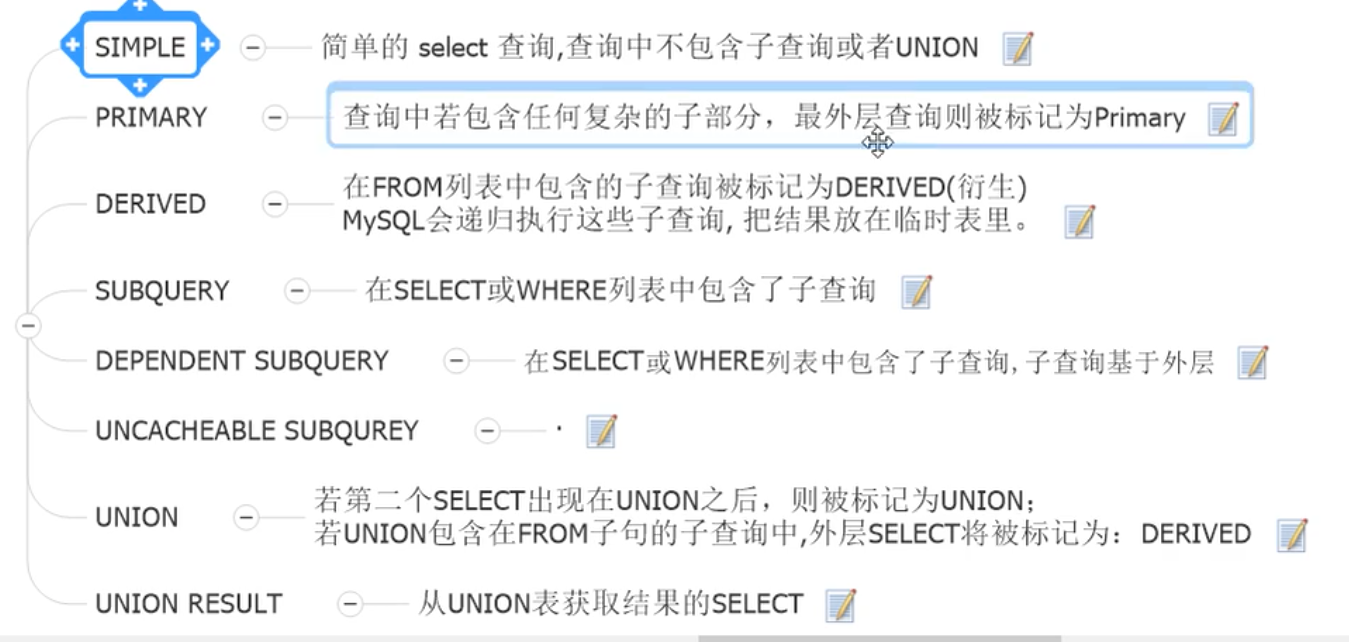

#### table  对应的表，表名，别名，衍生表

#### type  显示查询的类型

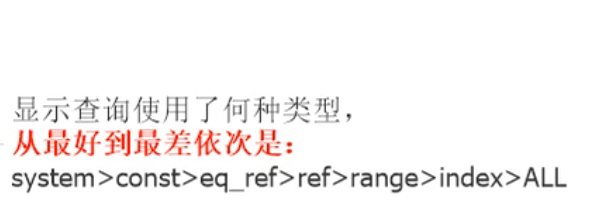

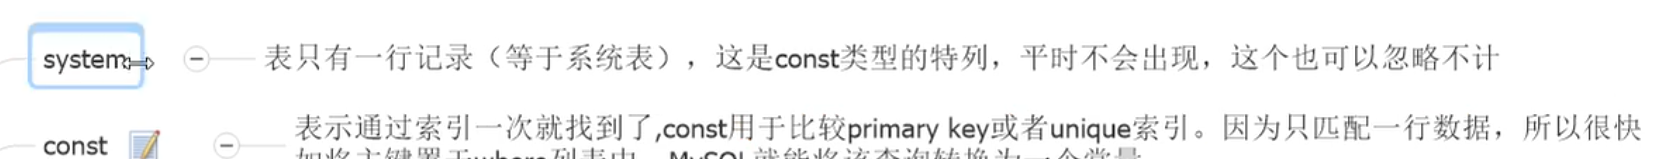

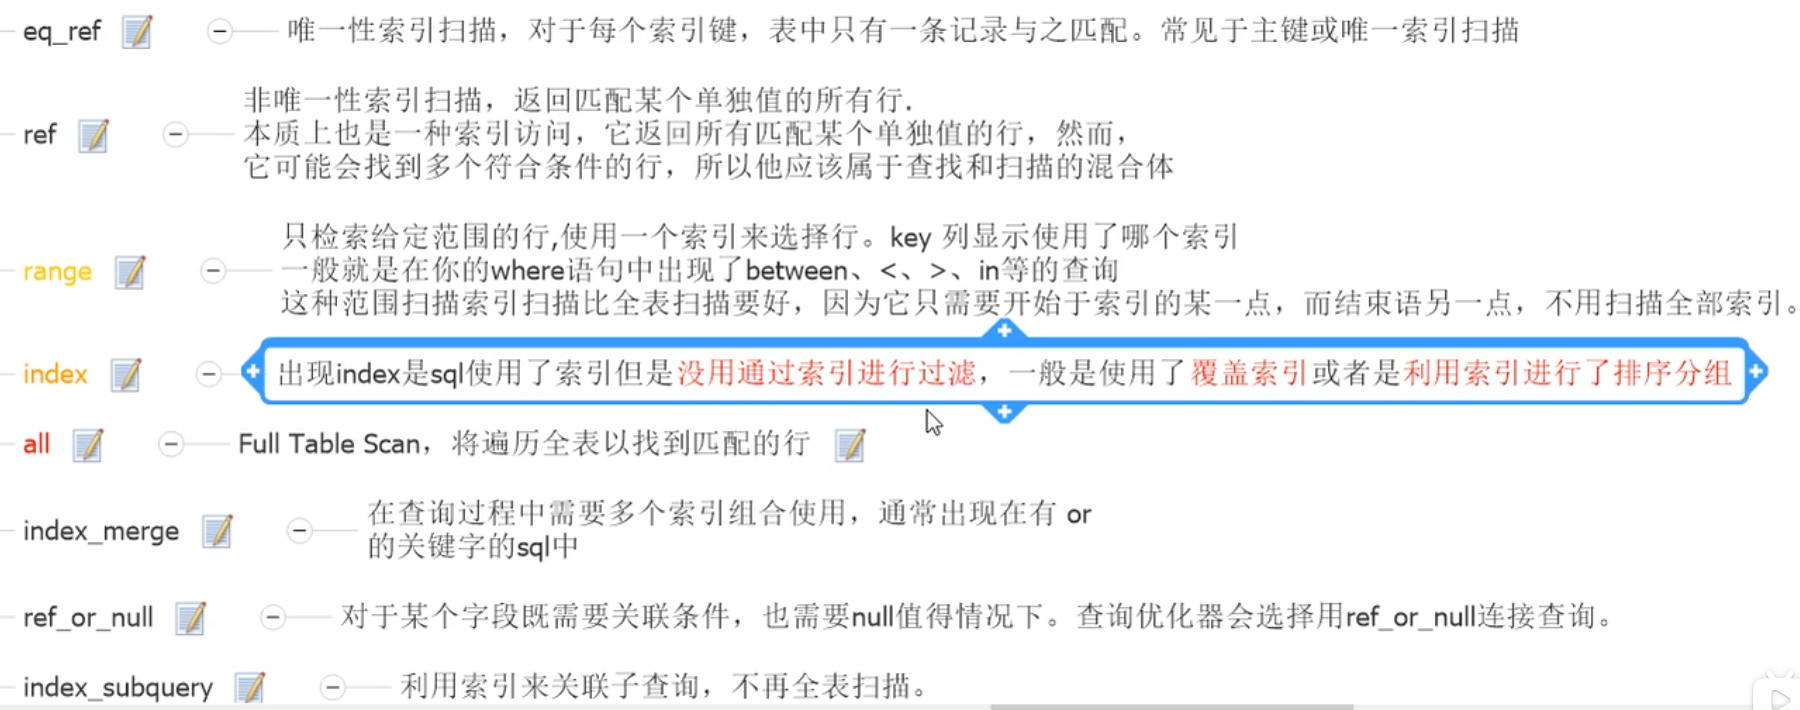

#### key 实际使用的索引

#### extra  额外信息

USing filesort: order by 没使用索引  
Using temporary: group by 没使用索引  
Using join buffer: 关联字段没有索引



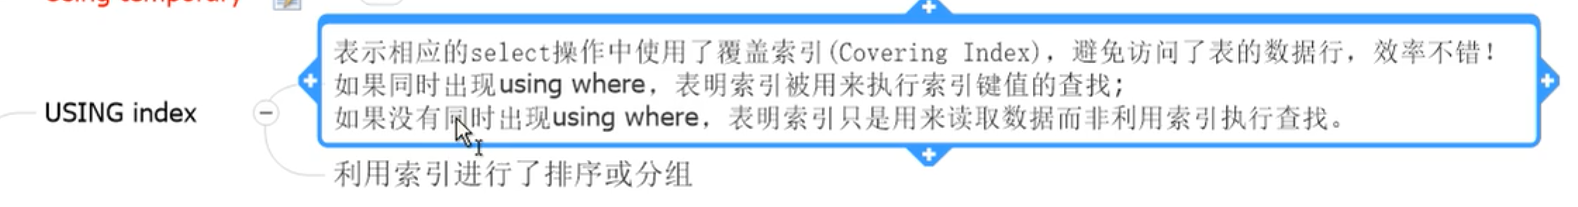

### 单表索引优化

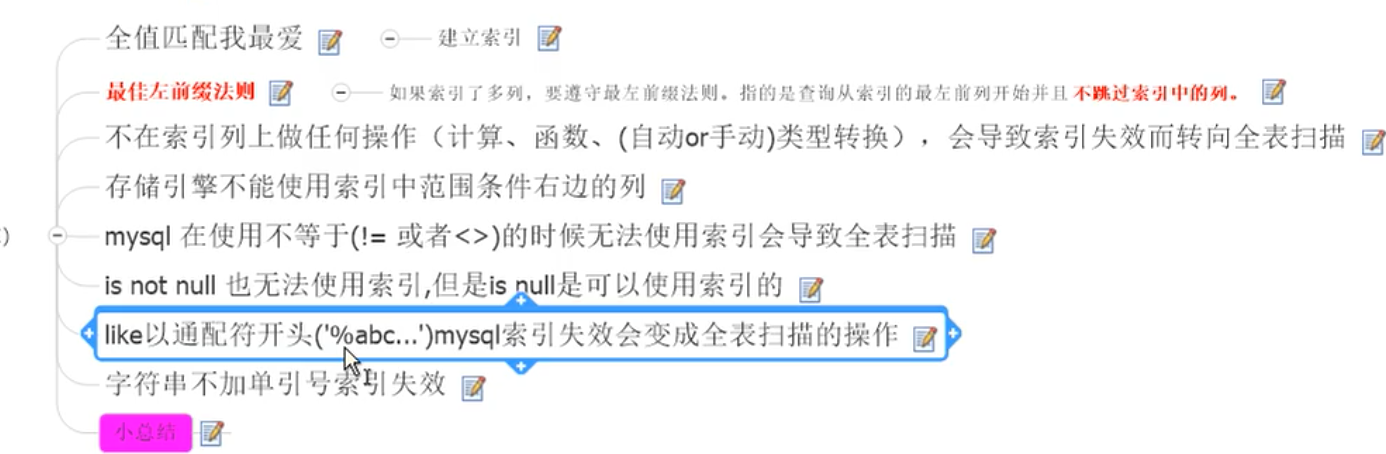

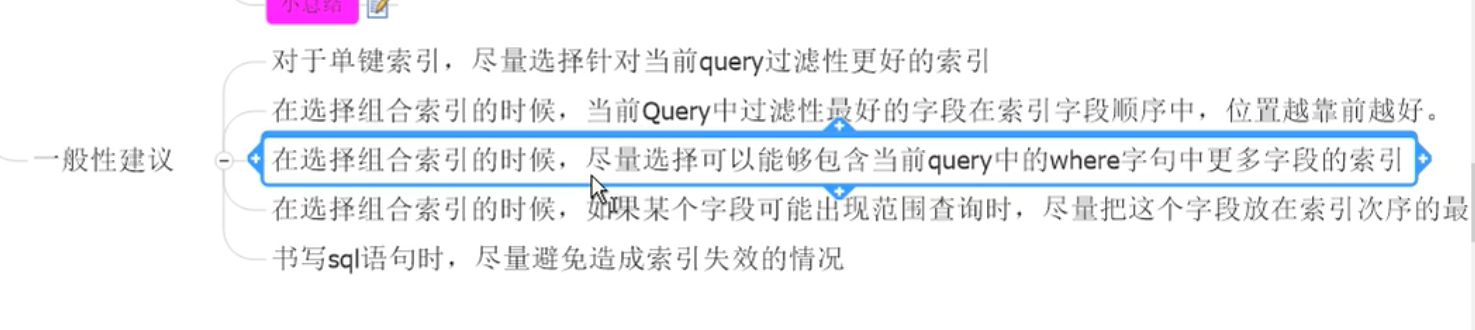

### 多表索引优化

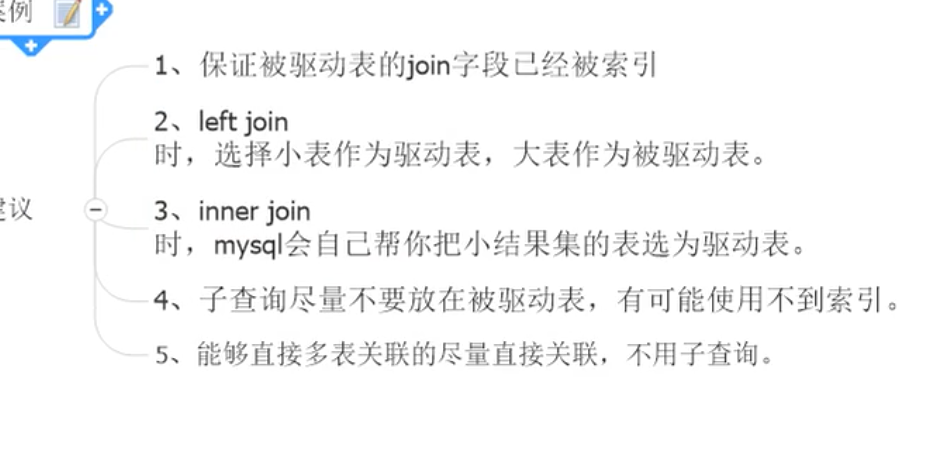

### order by

### 覆盖索引

### 注意点

#### 范围查找后的索引失效

## leetcode

### 复习

Easy:  
175,176,181,182,183,197,511,512,577,586,595,596,597,603，607,610,613,619，620,1050,1068,1069,1075,1076  
1082,1083,1084，1113,1141,1142,1148,1173,1179,1211,1241,1251,1280,1294,1303,1322,1327,1350,1378,1047,1485,1495,1511

Medium： 
177,178,180,184,534,550,570,574,578,580,585,602,608,612,614,626,1045,1070,1077,1098,1107,1112  
1126,1132,1149,1158,1164,1174,1204,1193,1205，1212,1264,1270,1285,1308，1321，1341，1355,1364，1393  
1398, 1424, 1440, 1445, 1454, 1459, 1468

### Null 相关

In [ ]:
null 也会被group by 一组

#### 619 Biggest Single Number

In [ ]:
Table my_numbers contains many numbers in column num including duplicated ones.
Can you write a SQL query to find the biggest number, which only appears once.

+---+
|num|
+---+
| 8 |
| 8 |
| 3 |
| 3 |
| 1 |
| 4 |
| 5 |
| 6 | 

For the sample data above, your query should return the following result:

+---+
|num|
+---+
| 6 |

Note:
If there is no such number, just output null. 


如果没有该结果想输出NULL，该如何操作？直接select是出不来的

```mysql
select num from my_numbers
group by num
having count(*) = 1
order by num desc
limit 1; 
```

只要一个select 如果没有满足条件的数据，什么也不返回，有两种方法返回NULL

1、IFNULL

```mysql
select ifnull((select num from my_numbers
group by num
having count(*) = 1
order by num desc
limit 1),null) as num;
```

2、select max

```mysql
select max(num) as num
from (select num from my_numbers
		group by num
		having count(*) = 1) as t
```

现有一个临时表，若它为空，那max是可以返回null的

#### 607. Sales Person

### 其他

In [ ]:
Description

Given three tables: salesperson, company, orders.
Output all the names in the table salesperson, who didn’t have sales to company 'RED'.

Example
Input

Table: salesperson

+----------+------+--------+-----------------+-----------+
| sales_id | name | salary | commission_rate | hire_date |
+----------+------+--------+-----------------+-----------+
|   1      | John | 100000 |     6           | 4/1/2006  |
|   2      | Amy  | 120000 |     5           | 5/1/2010  |
|   3      | Mark | 65000  |     12          | 12/25/2008|
|   4      | Pam  | 25000  |     25          | 1/1/2005  |
|   5      | Alex | 50000  |     10          | 2/3/2007  |
+----------+------+--------+-----------------+-----------+

The table salesperson holds the salesperson information. Every salesperson has a sales_id and a name.

Table: company

+---------+--------+------------+
| com_id  |  name  |    city    |
+---------+--------+------------+
|   1     |  RED   |   Boston   |
|   2     | ORANGE |   New York |
|   3     | YELLOW |   Boston   |
|   4     | GREEN  |   Austin   |
+---------+--------+------------+

The table company holds the company information. Every company has a com_id and a name.

Table: orders

+----------+------------+---------+----------+--------+
| order_id | order_date | com_id  | sales_id | amount |
+----------+------------+---------+----------+--------+
| 1        |   1/1/2014 |    3    |    4     | 100000 |
| 2        |   2/1/2014 |    4    |    5     | 5000   |
| 3        |   3/1/2014 |    1    |    1     | 50000  |
| 4        |   4/1/2014 |    1    |    4     | 25000  |
+----------+----------+---------+----------+--------+

The table orders holds the sales record information, salesperson and customer company are represented by sales_id and com_id.

output

+------+
| name | 
+------+
| Amy  | 
| Mark | 
| Alex |
+------+



1、视同not in
```sql
select `name` from salesperson
where sales_id not in (
                        select o.sales_id 
                        from orders as o 
                        join company as c 
                        on o.com_id = c.com_id
                        where c.name = 'RED'
);
```

2、 三表连接
```sql
select S.name
from salesperson as S 
left join orders as O 
on O.sales_id = S.sales_id
left join company as C 
on O.com_id = C.com_id
group by S.sales_id
having sum(C.name = 'RED') = 0
or sum(C.name = 'RED') is null;
```

若果一个人没有任何的销售记录，他的C.name 一列只有null， 不会进行判断，  
所以sum(C.name = 'RED') 会是null， 需要用 is null 捕捉

#### group_concat 函数

```mysql
select sell_date, count(distinct product) as num_sold,
group_concat(distinct product order by product separator ',') as products
from Activities
group by sell_date
```

把一列数据合并成字符串，可以指定如何排序，separator

#### 窗口和group by同时用  1596. 每位顾客最经常订购的商品

In [ ]:
表：Customers

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| customer_id   | int     |
| name          | varchar |
+---------------+---------+
customer_id 是该表主键
该表包含所有顾客的信息

 

表：Orders

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| order_id      | int     |
| order_date    | date    |
| customer_id   | int     |
| product_id    | int     |
+---------------+---------+
order_id 是该表主键
该表包含顾客 customer_id 的订单信息
没有顾客会在一天内订购相同的商品 多于一次

 

表：Products

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| product_id    | int     |
| product_name  | varchar |
| price         | int     |
+---------------+---------+
product_id 是该表主键
该表包含了所有商品的信息

 

写一个 SQL 语句，找到每一个顾客最经常订购的商品。

结果表单应该有每一位至少下过一次单的顾客 customer_id , 他最经常订购的商品的 product_id 和 product_name。

返回结果 没有顺序要求。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/the-most-frequently-ordered-products-for-each-customer
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
select T.customer_id, T.product_id, P.product_name
from (
    select customer_id, product_id,
    RANK() over(partition by customer_id order by count(order_id) desc) as rk
    from Orders
    group by customer_id, product_id
) as T
join Products as P
on T.product_id = P.product_id
where T.rk = 1;

group by之后，相当于一个个子表作为一个元素，  
以此题为例， 每个子表的customer_id, product_id相同， 可以partition by customer_id  
order by 后面+ 每个字表的行数，即一个客户购买同一商品的次数。  
这样就可以进行排序，每个子表得到一个rank

### 题号

#### 584. 寻找用户推荐人 Easy

In [ ]:
SQL架构

给定表 customer ，里面保存了所有客户信息和他们的推荐人。

+------+------+-----------+
| id   | name | referee_id|
+------+------+-----------+
|    1 | Will |      NULL |
|    2 | Jane |      NULL |
|    3 | Alex |         2 |
|    4 | Bill |      NULL |
|    5 | Zack |         1 |
|    6 | Mark |         2 |
+------+------+-----------+

写一个查询语句，返回一个编号列表，列表中编号的推荐人的编号都 不是 2。

对于上面的示例数据，结果为：

+------+
| name |
+------+
| Will |
| Jane |
| Bill |
| Zack |
+------+


```sql
select `name` 
from customer
where Ifnull(referee_id, 1) != 2;

select `name`
from customer
where referee_id is Null
or referee_id != 2

select `name`
from customer
where ( case
        when referee_id = 2 then 1
        else 0
        end) = 0
```

#### 1495. Friendly Movies Streamed Last Month Easy (date 的操作)

题目中要求找出2020年6月

1、 DATE_FORMAT
```sql
where DATE_FORMAT(TV.program_date, '%Y-%m') = '2020-06'
```

2、 直接使用日期比较
```sql
where TV.program_date between '2020-06-01' and '2020-06-30'
```

3、like
```sql
where TV.program_date like '2020-06%'
```

4、 LEFT
```sql
where LEFT(TV.program_date, 7) = '2020-06'
```

#### 597. Friend Requests I: Overall Acceptance Rate

```sql
select round( ifnull( 
    (select count(distinct requester_id, accepter_id) from request_accepted) / 
    (select count(distinct sender_id, send_to_id) from friend_request), 0)
    ,2) as accept_rate;
```

计算好友申请通过率  
+ 除法分母为0会返回NULL
+ distinct 可以加多个字段

#### 1511. Customer Order Frequency

In [ ]:
Table: Customers

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| customer_id   | int     |
| name          | varchar |
| country       | varchar |
+---------------+---------+
customer_id is the primary key for this table.
This table contains information of the customers in the company.

 

Table: Product

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| product_id    | int     |
| description   | varchar |
| price         | int     |
+---------------+---------+
product_id is the primary key for this table.
This table contains information of the products in the company.
price is the product cost.

 

Table: Orders

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| order_id      | int     |
| customer_id   | int     |
| product_id    | int     |
| order_date    | date    |
| quantity      | int     |
+---------------+---------+
order_id is the primary key for this table.
This table contains information on customer orders.
customer_id is the id of the customer who bought "quantity" products with id "product_id".
Order_date is the date in format ('YYYY-MM-DD') when the order was shipped.

 

Write an SQL query to report the customer_id and customer_name of customers who have spent at least $100 in each month of June and July 2020.

Return the result table in any order.

The query result format is in the following example.

 

Customers
+--------------+-----------+-------------+
| customer_id  | name      | country     |
+--------------+-----------+-------------+
| 1            | Winston   | USA         |
| 2            | Jonathan  | Peru        |
| 3            | Moustafa  | Egypt       |
+--------------+-----------+-------------+

Product
+--------------+-------------+-------------+
| product_id   | description | price       |
+--------------+-------------+-------------+
| 10           | LC Phone    | 300         |
| 20           | LC T-Shirt  | 10          |
| 30           | LC Book     | 45          |
| 40           | LC Keychain | 2           |
+--------------+-------------+-------------+

Orders
+--------------+-------------+-------------+-------------+-----------+
| order_id     | customer_id | product_id  | order_date  | quantity  |
+--------------+-------------+-------------+-------------+-----------+
| 1            | 1           | 10          | 2020-06-10  | 1         |
| 2            | 1           | 20          | 2020-07-01  | 1         |
| 3            | 1           | 30          | 2020-07-08  | 2         |
| 4            | 2           | 10          | 2020-06-15  | 2         |
| 5            | 2           | 40          | 2020-07-01  | 10        |
| 6            | 3           | 20          | 2020-06-24  | 2         |
| 7            | 3           | 30          | 2020-06-25  | 2         |
| 9            | 3           | 30          | 2020-05-08  | 3         |
+--------------+-------------+-------------+-------------+-----------+

Result table:
+--------------+------------+
| customer_id  | name       |  
+--------------+------------+
| 1            | Winston    |
+--------------+------------+ 
Winston spent $300 (300 * 1) in June and $100 ( 10 * 1 + 45 * 2) in July 2020.
Jonathan spent $600 (300 * 2) in June and $20 ( 2 * 10) in July 2020.
Moustafa spent $110 (10 * 2 + 45 * 2) in June and $0 in July 2020.

In [ ]:
#可以按照LEFT 函数进行group
/*
select O.customer_id, C.name, LEFT(O.order_date, 7), sum(O.quantity * P.price) as total_price
from Orders as O 
join Product as P 
on O.product_id = P.product_id
join Customers as C
on O.customer_id = C.customer_id
where O.order_date between '2020-06-01' and '2020-07-31'
group by O.customer_id, LEFT(O.order_date, 7)
*/

select customer_id, `name`
from
(
select O.customer_id, C.name, LEFT(O.order_date, 7), sum(O.quantity * P.price) as total_price
from Orders as O 
join Product as P 
on O.product_id = P.product_id
join Customers as C
on O.customer_id = C.customer_id
where O.order_date between '2020-06-01' and '2020-07-31'
group by O.customer_id, LEFT(O.order_date, 7)
) as T 
group by customer_id
having sum(total_price >= 100) = 2

In [ ]:
#2 用having + if 过滤

select O.customer_id, C.name
from Orders as O 
join Product as P 
on O.product_id = P.product_id
join Customers as C
on O.customer_id = C.customer_id
group by O.customer_id
having SUM(if(O.order_date like '2020-06%', O.quantity * P.price, 0)) >= 100
and SUM(if(O.order_date like '2020-07%', O.quantity * P.price, 0)) >= 100;

#### 178. Rank Scores 排序方法

In [ ]:
Write a SQL query to rank scores. If there is a tie between two scores, both should have the same ranking. Note that after a tie, the next ranking number should be the next consecutive integer value. In other words, there should be no "holes" between ranks.

+----+-------+
| Id | Score |
+----+-------+
| 1  | 3.50  |
| 2  | 3.65  |
| 3  | 4.00  |
| 4  | 3.85  |
| 5  | 4.00  |
| 6  | 3.65  |
+----+-------+

For example, given the above Scores table, your query should generate the following report (order by highest score):

+-------+---------+
| score | Rank    |
+-------+---------+
| 4.00  | 1       |
| 4.00  | 1       |
| 3.85  | 2       |
| 3.65  | 3       |
| 3.65  | 3       |
| 3.50  | 4       |
+-------+---------+


#一种奇怪的排序
```sql
select s1.Score, count(distinct s2.Score) as `Rank`
from Scores as s1
join Scores as s2
on s1.Score <= s2.Score
group by s1.Id
order by `Rank`;
```

window function
```sql
select
Score,
DENSE_RANK() OVER(order by Score DESC) as Rank
from Scores;
```

#### 1393. 股票的资本损益  股票计算

In [ ]:
Stocks 表：

+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| stock_name    | varchar |
| operation     | enum    |
| operation_day | int     |
| price         | int     |
+---------------+---------+
(stock_name, day) 是这张表的主键
operation 列使用的是一种枚举类型，包括：('Sell','Buy')
此表的每一行代表了名为 stock_name 的某支股票在 operation_day 这一天的操作价格。
保证股票的每次'Sell'操作前，都有相应的'Buy'操作。

 

编写一个SQL查询来报告每支股票的资本损益。

股票的资本损益是一次或多次买卖股票后的全部收益或损失。

以任意顺序返回结果即可。

SQL查询结果的格式如下例所示：

Stocks 表:
+---------------+-----------+---------------+--------+
| stock_name    | operation | operation_day | price  |
+---------------+-----------+---------------+--------+
| Leetcode      | Buy       | 1             | 1000   |
| Corona Masks  | Buy       | 2             | 10     |
| Leetcode      | Sell      | 5             | 9000   |
| Handbags      | Buy       | 17            | 30000  |
| Corona Masks  | Sell      | 3             | 1010   |
| Corona Masks  | Buy       | 4             | 1000   |
| Corona Masks  | Sell      | 5             | 500    |
| Corona Masks  | Buy       | 6             | 1000   |
| Handbags      | Sell      | 29            | 7000   |
| Corona Masks  | Sell      | 10            | 10000  |
+---------------+-----------+---------------+--------+

Result 表:
+---------------+-------------------+
| stock_name    | capital_gain_loss |
+---------------+-------------------+
| Corona Masks  | 9500              |
| Leetcode      | 8000              |
| Handbags      | -23000            |
+---------------+-------------------+


卖出即正，买进即负，求和

In [ ]:
select stock_name, 
sum(case operation
    when 'Buy' then -price
    when 'Sell' then price
    end
    ) as capital_gain_loss
from Stocks
group by stock_name;

#### 196. 删除重复的电子邮箱

In [ ]:
编写一个 SQL 查询，来删除 Person 表中所有重复的电子邮箱，重复的邮箱里只保留 Id 最小 的那个。

+----+------------------+
| Id | Email            |
+----+------------------+
| 1  | john@example.com |
| 2  | bob@example.com  |
| 3  | john@example.com |
+----+------------------+
Id 是这个表的主键。

例如，在运行你的查询语句之后，上面的 Person 表应返回以下几行:

+----+------------------+
| Id | Email            |
+----+------------------+
| 1  | john@example.com |
| 2  | bob@example.com  |
+----+------------------+

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/delete-duplicate-emails
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
delete P1
from Person as P1
join Person as P2 
on P1.Email = P2.Email
where P1.Id > P2.Id

#### 512. 游戏玩法分析 II

In [ ]:
Table: Activity

+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| player_id    | int     |
| device_id    | int     |
| event_date   | date    |
| games_played | int     |
+--------------+---------+
(player_id, event_date) 是这个表的两个主键
这个表显示的是某些游戏玩家的游戏活动情况
每一行是在某天使用某个设备登出之前登录并玩多个游戏（可能为0）的玩家的记录

请编写一个 SQL 查询，描述每一个玩家首次登陆的设备名称

查询结果格式在以下示例中：

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/game-play-analysis-ii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
# Write your MySQL query statement below
/*
select player_id, device_id
from Activity
where (player_id, event_date) in (select player_id, min(event_date) as fd
                                    from Activity
                                    group by player_id)
*/

select A.player_id, A.device_id
from Activity as A
join (
    select player_id, min(event_date) as fd
    from Activity
    group by player_id
) as T
on A.player_id = T.player_id
and A.event_date = T.fd

#### 577. 员工奖金

In [ ]:
选出所有 bonus < 1000 的员工的 name 及其 bonus。

Employee 表单

+-------+--------+-----------+--------+
| empId |  name  | supervisor| salary |
+-------+--------+-----------+--------+
|   1   | John   |  3        | 1000   |
|   2   | Dan    |  3        | 2000   |
|   3   | Brad   |  null     | 4000   |
|   4   | Thomas |  3        | 4000   |
+-------+--------+-----------+--------+
empId 是这张表单的主关键字

Bonus 表单

+-------+-------+
| empId | bonus |
+-------+-------+
| 2     | 500   |
| 4     | 2000  |
+-------+-------+
empId 是这张表单的主关键字

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/employee-bonus
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
# Write your MySQL query statement below
/*
select `name`, bonus
from Employee as E
left join Bonus as B 
on E.empId = B.empId
where IFnull(B.bonus, 0) < 1000;
*/

# case when
select E.name, B.bonus
from Employee as E
left join Bonus as B
on E.empId = B.empId
where (case
       when B.bonus is Null then 0
       when B.bonus < 1000 then 0
       else 1
       end) = 0;

#### 586. 订单最多的客户

In [ ]:
在表 orders 中找到订单数最多客户对应的 customer_number 。

数据保证订单数最多的顾客恰好只有一位。

表 orders 定义如下：

| Column            | Type      |
|-------------------|-----------|
| order_number (PK) | int       |
| customer_number   | int       |
| order_date        | date      |
| required_date     | date      |
| shipped_date      | date      |
| status            | char(15)  |
| comment           | char(200) |

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/customer-placing-the-largest-number-of-orders
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
select customer_number
from orders
group by customer_number
order by count(order_number) DESC
limit 1;

#### 1083. 销售分析 II

In [ ]:
Table: Product

+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| product_id   | int     |
| product_name | varchar |
| unit_price   | int     |
+--------------+---------+
product_id 是这张表的主键

Table: Sales

+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| seller_id   | int     |
| product_id  | int     |
| buyer_id    | int     |
| sale_date   | date    |
| quantity    | int     |
| price       | int     |
+------ ------+---------+
这个表没有主键，它可以有重复的行.
product_id 是 Product 表的外键.

编写一个 SQL 查询，查询购买了 S8 手机却没有购买 iPhone 的买家。注意这里 S8 和 iPhone 是 Product 表中的产品。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/sales-analysis-ii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
select s.buyer_id
from Product as p
join Sales as s 
on p.product_id = s.product_id
group by s.buyer_id
having sum(p.product_name = 'S8') > 0
and sum(p.product_name = 'iPhone') = 0;

#### 534. 游戏玩法分析 III

In [ ]:
Table: Activity

+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| player_id    | int     |
| device_id    | int     |
| event_date   | date    |
| games_played | int     |
+--------------+---------+
（player_id，event_date）是此表的主键。
这张表显示了某些游戏的玩家的活动情况。
每一行是一个玩家的记录，他在某一天使用某个设备注销之前登录并玩了很多游戏（可能是 0 ）。

 

编写一个 SQL 查询，同时报告每组玩家和日期，以及玩家到目前为止玩了多少游戏。也就是说，在此日期之前玩家所玩的游戏总数。详细情况请查看示例。

查询结果格式如下所示：

Activity table:
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-05-02 | 6            |
| 1         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-02 | 0            |
| 3         | 4         | 2018-07-03 | 5            |
+-----------+-----------+------------+--------------+

Result table:
+-----------+------------+---------------------+
| player_id | event_date | games_played_so_far |
+-----------+------------+---------------------+
| 1         | 2016-03-01 | 5                   |
| 1         | 2016-05-02 | 11                  |
| 1         | 2017-06-25 | 12                  |
| 3         | 2016-03-02 | 0                   |
| 3         | 2018-07-03 | 5                   |
+-----------+------------+---------------------+

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/game-play-analysis-iii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

In [ ]:
select a1.player_id, a1.event_date, sum(a2.games_played) as games_played_so_far
from Activity as a1
join Activity as a2 
on a1.player_id = a2.player_id and a1.event_date >= a2.event_date
group by a1.player_id, a1.event_date
order by a1.player_id, a1.event_date;




select player_id, event_date,
SUM(games_played) over(partition by player_id order by event_date) as "games_played_so_far"
from Activity;

#### 1699. 两人之间的通话次数

In [ ]:


编写 SQL 语句，查询每一对用户 (person1, person2) 之间的通话次数和通话总时长，其中 person1 < person2 。

以任意顺序返回结果表。

查询结果格式如下示例所示：

 

Calls 表：
+---------+-------+----------+
| from_id | to_id | duration |
+---------+-------+----------+
| 1       | 2     | 59       |
| 2       | 1     | 11       |
| 1       | 3     | 20       |
| 3       | 4     | 100      |
| 3       | 4     | 200      |
| 3       | 4     | 200      |
| 4       | 3     | 499      |
+---------+-------+----------+

结果表：
+---------+---------+------------+----------------+
| person1 | person2 | call_count | total_duration |
+---------+---------+------------+----------------+
| 1       | 2       | 2          | 70             |
| 1       | 3       | 1          | 20             |
| 3       | 4       | 4          | 999            |
+---------+---------+------------+----------------+
用户 1 和 2 打过 2 次电话，总时长为 70 (59 + 11)。
用户 1 和 3 打过 1 次电话，总时长为 20。
用户 3 和 4 打过 4 次电话，总时长为 999 (100 + 200 + 200 + 499)。


先换顺序  
```mysql
select 
    T.from_id person1,
    T.to_id person2,
    count(T.from_id) call_count,
    SUM(duration) total_duration
from (
    select 
        if(from_id < to_id, from_id, to_id) as from_id,
        if(from_id > to_id, from_id, to_id) as to_id,
        duration
    from Calls
) as T 
group by T.from_id, T.to_id;
```

用函数，group by
```mysql
select 
    least(from_id, to_id) person1,
    greatest(from_id, to_id) person2,
    count(from_id) call_count,
    SUM(duration) total_duration
from Calls
group by least(from_id, to_id), greatest(from_id, to_id);
```

## 牛客

### 插入数据

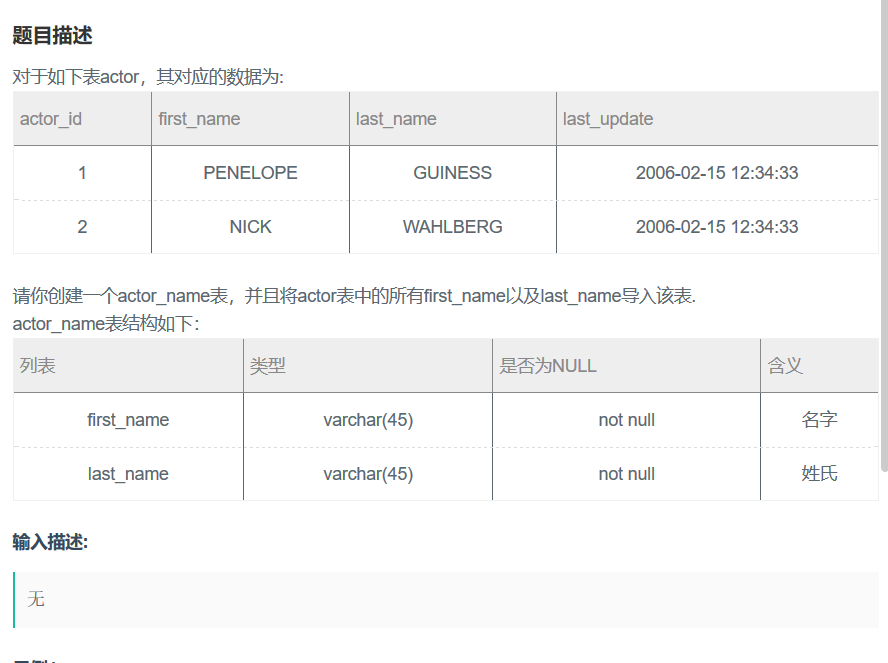

In [ ]:
1. 先建表，，再插入
create table if not exists actor_name(
first_name varchar(45) not null,
last_name varchar(45) not null
);


insert into actor_name
select first_name, last_name from actor;

2. 建表同时插入
create table if not exists actor_name(
first_name varchar(45) not null,
last_name varchar(45) not null
)
select first_name, last_name from actor;


## 随记

mysql 字符串函数各种复习  
-- CONCAT(str1, str2)：字符连接函数  
-- UPPER(str)：将字符串改为大写字母  
-- LOWER(str)：将字符串改为小写字母  
-- LENGTH(str)：判定字符串长度  
-- SUBSTRING(str, a, b):提取字段中的一段，从字符串str的第a位开始提取，提取b个字符  
-- LEFT(str, n)：提取字符串最左边的n个字符  
-- RIGHT(str, n)：提取字符串最右边的n个字符  


1、char_length(str)  
（1）计算单位：字符  
（2）不管汉字还是数字或者是字母都算是一个字符  
2、length(str)  
（1）计算单位：字节  
（2）utf8编码：一个汉字三个字节，一个数字或字母一个字节。  
（3）gbk编码：一个汉字两个字节，一个数字或字母一个字节  
